# Natural Language Process

In [1]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2024-05-10 04:01:22--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  4.47MB/s    in 24s     

2024-05-10 04:01:46 (3.35 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [2]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [3]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [4]:
mini_dataset = ["This movie is very good.",
                "This film is a good",
                "Very bad. Very, very bad."]

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 1-gram
vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df1 = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())

# 2-gram
vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df2 = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())

print("1-gram")
display(df1)
print("2-gram")
display(df2)

1-gram


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


2-gram


,a,a good,bad,bad very,film,film is,good,is,is a,is very,movie,movie is,this,this film,this movie,very,very bad,very good,very very
0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0
1,1,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0
2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,3,2,0,1


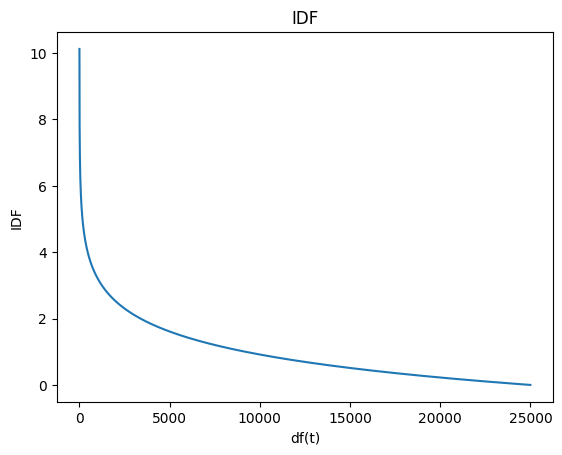

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

# [Problem 1] Scratch implementation of BoW

In [7]:
def generate_ngram_counts(texts, n):
    ngram_counts = {}
    for i, text in enumerate(texts):
        ngram_counts[f'Sentence_{i+1}'] = {}
        words = text.split()
        for j in range(len(words) - n + 1):
            ngram = ' '.join(words[j:j+n])
            ngram_counts[f'Sentence_{i+1}'][ngram] = ngram_counts[f'Sentence_{i+1}'].get(ngram, 0) + 1

    return pd.DataFrame(ngram_counts).fillna(0).astype(int).T

In [8]:
texts = ["This movie is SOOOO funny!!!", "What a movie! I never", "best movie ever!!!!! this movie"]

n=1
ngram_counts = generate_ngram_counts(texts, n)
display(ngram_counts)

n=2
ngram_counts = generate_ngram_counts(texts, n)
display(ngram_counts)


,This,movie,is,SOOOO,funny!!!,What,a,movie!,I,never,best,ever!!!!!,this
Sentence_1,1,1,1,1,1,0,0,0,0,0,0,0,0
Sentence_2,0,0,0,0,0,1,1,1,1,1,0,0,0
Sentence_3,0,2,0,0,0,0,0,0,0,0,1,1,1


,This movie,movie is,is SOOOO,SOOOO funny!!!,What a,a movie!,movie! I,I never,best movie,movie ever!!!!!,ever!!!!! this,this movie
Sentence_1,1,1,1,1,0,0,0,0,0,0,0,0
Sentence_2,0,0,0,0,1,1,1,1,0,0,0,0
Sentence_3,0,0,0,0,0,0,0,0,1,1,1,1


# [Problem 2] Calculation of TF-IDF

In [ ]:
! pip install nltk

In [11]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
vectorizer = CountVectorizer(stop_words=stop_words, max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
bow_test = (vectorizer.fit_transform(x_test)).toarray()
#print(bow_train)
df_train = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
df_test = pd.DataFrame(bow_test, columns=vectorizer.get_feature_names_out())
display(df_train.head(20))
display(df_test.head(20))
print("df train shape: {}".format(df_train.shape))
print("df test shape: {}".format(df_test.shape))

,00,000,10,100,11,12,13,13th,14,15,...,york,young,younger,youth,zellweger,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,00,000,10,100,11,12,13,13th,14,15,...,york,young,younger,youth,zellweger,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


df train shape: (25000, 5000)
df test shape: (25000, 5000)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm='l2',max_features = 5000,stop_words=stop_words)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

print("train shape: {}".format(X_train.shape))
print("tets shape: {}".format(X_test.shape))
print(X_train)


train shape: (25000, 5000)
tets shape: (25000, 5000)
  (0, 2158)	0.16743479423204646
  (0, 4444)	0.10041129167597976
  (0, 2156)	0.1279936881849026
  (0, 1769)	0.15681106322388316
  (0, 3884)	0.05436294092381458
  (0, 2609)	0.13078643200728501
  (0, 267)	0.08381220735492088
  (0, 201)	0.08282260831175318
  (0, 1670)	0.16768439105128702
  (0, 4045)	0.1495900878396859
  (0, 1920)	0.08322948062718752
  (0, 1734)	0.0809511532827876
  (0, 1459)	0.17300582102971174
  (0, 475)	0.13734353234274008
  (0, 111)	0.14007222716965326
  (0, 2932)	0.1671726902261627
  (0, 1606)	0.1649274006108069
  (0, 4443)	0.2625874845921025
  (0, 3436)	0.1465074496779634
  (0, 3635)	0.14016268714570973
  (0, 114)	0.07492419060647448
  (0, 1737)	0.14034457344060158
  (0, 4515)	0.052427901534780254
  (0, 2907)	0.0905258969962952
  (0, 1933)	0.09528142995538946
  :	:
  (24999, 3233)	0.03561752132456323
  (24999, 902)	0.1001893037306074
  (24999, 2053)	0.06323310163928071
  (24999, 1739)	0.08018138417806203
  (24999, 2

# [Problem 3] Learning using TF-IDF

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.881

# [Problem 4] Scratch implementation of TF-IDF

In [ ]:
from collections import Counter
from numpy.linalg import norm
import scipy.sparse as sp

In [ ]:
class TFIDF(object):

    def __init__(self, corpus):
        self.corpus = corpus

    def __normalize_corpus(self, d):
        stop_words = nltk.corpus.stopwords.words('english')
        d = re.sub(r'[^a-zA-Z0-9\s]', '', d, re.I|re.A)
        d = d.lower().strip()
        tks = nltk.word_tokenize(d)
        f_tks = [t for t in tks if t not in stop_words]
        return ' '.join(f_tks)

    def preprocessing_text(self):
        n_c = np.vectorize(self.__normalize_corpus)
        self.norm_corpus = n_c(self.corpus)

    def tf(self):
        words_array = [doc.split() for doc in self.norm_corpus]
        words = list(set([word for words in words_array for word in words]))
        features_dict = {w:0 for w in words}
        tf = []
        for doc in self.norm_corpus:
            bowf_doc = Counter(doc.split())
            all_f = Counter(features_dict)
            bowf_doc.update(all_f)
            tf.append(bowf_doc)
        return pd.DataFrame(tf)

    def df(self, tf):
        features_names = list(tf.columns)
        df = np.diff(sp.csc_matrix(tf, copy=True).indptr)
        df = 1 + df
        return df

    def idf(self, df):
        N = 1 + len(self.norm_corpus)
        idf = (1.0 + np.log(float(N) / df))
        idf_d = sp.spdiags(idf, diags= 0, m=len(df), n= len(df)).todense()
        return idf, idf_d

    def tfidf(self, tf, idf):
        tf = np.array(tf, dtype='float64')
        tfidf = tf * idf
        norms = norm(tfidf , axis=1)
        return (tfidf / norms[:,None])

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re

texts =  ["This movie is SOOOO funny!!!",
                  "What a movie! I never",
                  "best movie ever!!!!! this movie"]


tfidf_scratch = TFIDF(texts)
tfidf_scratch.preprocessing_text()

tf = tfidf_scratch.tf()
print("TF:\n",tf)

df = tfidf_scratch.df(tf)
print("df\n",df)

idf, idf_2 = tfidf_scratch.idf(df)
print("IDF:\n",idf)

tfidf = tfidf_scratch.tfidf(tf,idf)
print("TF-IDF: \n",tfidf)

df = pd.DataFrame(np.round(tfidf,2),columns = list(tf.columns))
display(df)

TF:
    movie  soooo  funny  ever  best  never
0      1      1      1     0     0      0
1      1      0      0     0     0      1
2      2      0      0     1     1      0
df
 [4 2 2 2 2 2]
IDF:
 [1.         1.69314718 1.69314718 1.69314718 1.69314718 1.69314718]
TF-IDF: 
 [[0.38537163 0.65249088 0.65249088 0.         0.         0.        ]
 [0.50854232 0.         0.         0.         0.         0.861037  ]
 [0.64105545 0.         0.         0.54270061 0.54270061 0.        ]]


,movie,soooo,funny,ever,best,never
0,0.39,0.65,0.65,0.00,0.00,0.00
1,0.51,0.00,0.00,0.00,0.00,0.86
2,0.64,0.00,0.00,0.54,0.54,0.00


# [Problem 5] Corpus preprocessing

In [16]:
vectorizer = CountVectorizer(stop_words=stop_words, max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train)).toarray()
sentences = vectorizer.get_feature_names_out()
print(sentences)

['00' '000' '10' ... 'zombie' 'zombies' 'zone']


# [Problem 6] Learning Word2Vec

In [17]:
! pip install gensim

In [19]:
from gensim.models import Word2Vec

sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]

model = Word2Vec(min_count=1, vector_size=10)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

print("Vocabulary list : {}".format(model.wv.key_to_index.keys()))

for vocab in model.wv.key_to_index.keys():
  print("{} vector of : \n{}".format(vocab, model.wv[vocab]))

Vocabulary list : dict_keys(['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie'])
very vector of : 
[-0.00536227  0.00236431  0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458873  0.08972988 -0.05015428 -0.03763372]
bad vector of : 
[ 0.07380505 -0.01533471 -0.04536613  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448818]
good vector of : 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
is vector of : 
[-0.07511629 -0.00930048  0.09538178 -0.07319212 -0.02333783 -0.01937753
  0.08077487 -0.05930933  0.00045163 -0.04753764]
this vector of : 
[-0.0960355   0.05007293 -0.08759586 -0.04391825 -0.000351   -0.00296181
 -0.0766124   0.09614743  0.04982058  0.09233143]
a vector of : 
[-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
film vector of : 
[-0.01577672  0.00321376 -0.04140681 -0.07682785 -0.0

In [20]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.42731544375419617),
 ('bad', 0.32937225699424744),
 ('very', 0.3004249036312103)]

# [Problem 7] (Advanced) Vector visualization

In [28]:
sentences = ['this', 'movie', 'is', 'very', 'good', 'this', 'film', 'is', 'a', 'good', 'very', 'bad', 'very', 'very', 'bad']

(15, 10)


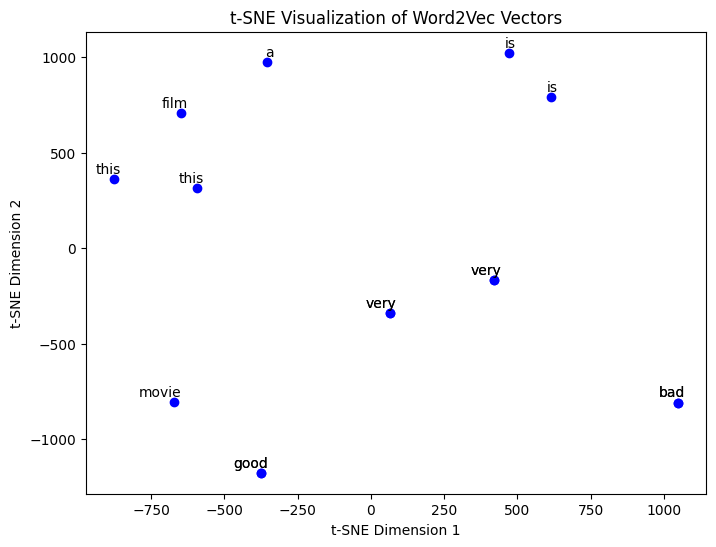

In [33]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


vectors = np.array([model.wv[word] for word in sentences])
print(vectors.shape)
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
vectors_2d = tsne.fit_transform(vectors)
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', c='b')
for i, word in enumerate(sentences):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                  textcoords='offset points', ha='right', va='bottom')
plt.title('t-SNE Visualization of Word2Vec Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()



In [34]:

# Find similar words
def find_similar_words(model, word, topn=5):
    similar_words = model.wv.most_similar(word, topn=topn)
    return similar_words

# Words to find similar words for
words_to_find_similar = ['movie']

# Find similar words for each word
for word in words_to_find_similar:
    similar_words = find_similar_words(model, word)
    print(f"Similar words for '{word}': {similar_words}")

Similar words for 'movie': [('good', 0.42731544375419617), ('is', 0.2941223680973053), ('bad', 0.23243053257465363), ('film', 0.19734419882297516), ('a', -0.0218169167637825)]


# [Problem 8] (Advanced Task) Movie review classification using Word2Vec

In [35]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

In [37]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
x_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [39]:
x_train = [txt.split() for txt in x_train]
x_train[0]

['Zero',
 'Day',
 'leads',
 'you',
 'to',
 'think,',
 'even',
 're-think',
 'why',
 'two',
 'boys/young',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 '-',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'their',
 'classmates.',
 'It',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'a',
 'bizarre',
 'mode',
 'of',
 'being',
 'for',
 'two',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'order',
 'to',
 'define',
 'their',
 'own/mutual',
 'world',
 'via',
 'coupled',
 'destruction.<br',
 '/><br',
 '/>It',
 'is',
 'not',
 'a',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'money/time',
 'the',
 'filmmaker',
 'and',
 'actors',
 'had',
 '-',
 'it',
 'is',
 'a',
 'remarkable',
 'product.',
 'In',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicide/murderers',
 'it',
 'is',
 'better',
 'than',
 "'Elephant'",
 '-',
 'in',
 'terms',
 'of',
 'being',
 'a

In [40]:
x_test = [txt.split() for txt in x_test]

In [54]:
# Train Word2Vec model on training data
model = Word2Vec(min_count=1, vector_size=16)
model.build_vocab(x_train+x_test)
model.train(x_train+x_test, total_examples=model.corpus_count, epochs=model.epochs)

(45750867, 57789235)

In [55]:
from tqdm import tqdm
vectors = []

for sent in tqdm(x_train):
  vector = np.array([model.wv[word] for word in sent])
  vectors.append(vector)


100%|██████████| 25000/25000 [00:13<00:00, 1804.78it/s]


In [56]:
vectors = [np.mean(vector, axis=0) for vector in vectors] #not good

In [57]:
vectors = np.array(vectors)

In [58]:
# Build and train a logistic regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(vectors, y_train)

LogisticRegression(max_iter=1000)

In [59]:
test_vec = []

for sent in tqdm(x_test):
  vector = np.array([model.wv[word] for word in sent])
  test_vec.append(vector)

100%|██████████| 25000/25000 [00:15<00:00, 1601.74it/s]


In [60]:
test_vec = [np.mean(vector, axis=0) for vector in test_vec]
test_vec = np.array(test_vec)

In [61]:
# Predict labels for test set
y_pred = classifier.predict(test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.64864
